Name: Gayathri Narayanan

# Prediction Using Supervised ML (Level-Beginner)

# Predict the percentage of student based on the number of study hours
 To find the predicted score if a student studies for 9.25 hrs/day

In [3]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading the  dataset
url='http://bit.ly/w-data'
    

In [6]:
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploratory Data Analysis

# univariate analysis

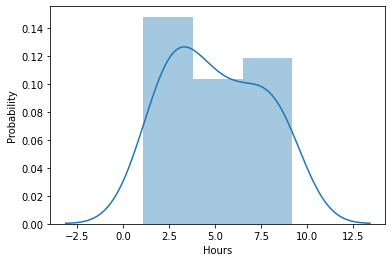

In [10]:

#distribution plot for hours

sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.show()

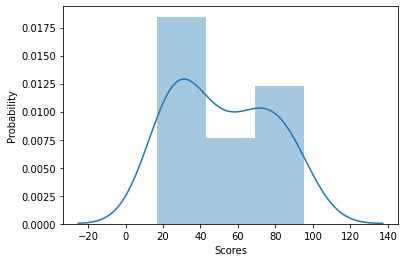

In [11]:
#distribution plot for scores

sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.show()

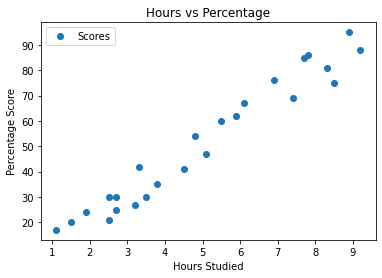

In [12]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# bivaraiate analysis

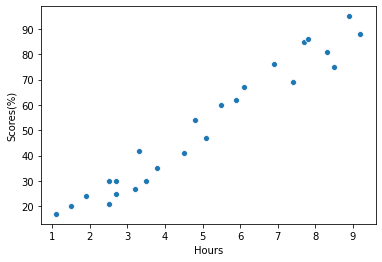

In [13]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.show()

We can see from the above graph that as number of hours increases score increases.

# Multivariate Analysis

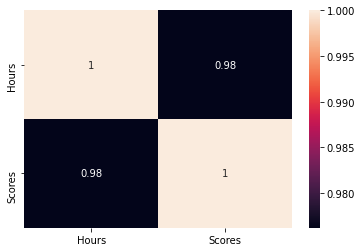

In [16]:
ax=sns.heatmap(df.corr(),annot=True) 

plt.show()

From the heatmap,we can see that correlation is highly positive and the value of correlation between no. of hours and scores is 0.98

# Splitting the data into traing and test set

In [23]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [28]:
X_train.shape,X_test.shape

((20, 1), (5, 1))

# Using Linear Regression for predicting the model

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [33]:
regressor = LinearRegression(fit_intercept=True)

In [36]:
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#intercept
regressor.intercept_

2.018160041434683

In [38]:
#coefficient
regressor.coef_

array([9.91065648])

# Plotting the regression line

Text(0.5, 1.0, 'Regression Line')

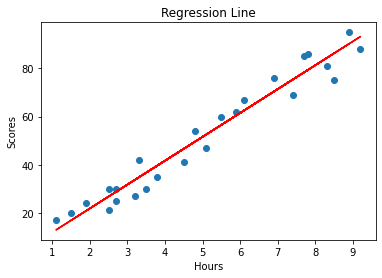

In [39]:
plt.scatter(X,y)
plt.plot(X,regressor.predict(X),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')

# Making Prediction


In [40]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
 #Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Testing for new data

In [52]:
Hours =np.array(9.25).reshape(-1,1)
own_pred = regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Scores = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Scores = 93.69173248737538


# Evaluating the model

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
RMSE= mean_squared_error(y_test,y_pred,squared=False)
print('The RMSE is: ',RMSE)

The RMSE is:  4.6474476121003665


In [54]:
MAE=mean_squared_error(y_test,y_pred)
print('The MAE is: ',MAE)

The MAE is:  21.5987693072174


Thus, the student score 93.69 if he studies for 9.25 hours per day